**Extract the ZIP File**

In [19]:
import zipfile
import os

# Path to the ZIP file
zip_file_path = '/content/titanic.zip'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/titanic')

# List the files inside the extracted folder to check the contents
extracted_files = os.listdir('/content/titanic')
extracted_files

['test.csv', 'train.csv', 'gender_submission.csv']

**Load the Titanic Dataset**

In [20]:
# Load the Titanic dataset
df = pd.read_csv('/content/titanic/train.csv')  # Adjust path if the file is named differently

# Display the first few rows of the dataset to understand its structure
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Cleaning**

In [22]:
# Check for missing values
df.isnull().sum()

# Fill missing values for 'Age' with the mean value and 'Embarked' with the mode
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop unnecessary columns like 'Name', 'Ticket', 'Cabin'
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Convert 'Sex' to numerical (0 for male, 1 for female)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Pclass' to a categorical variable (it is already numeric, but for analysis, it is useful to treat it as categorical)
df['Pclass'] = df['Pclass'].astype('category')

# Verify the cleaned dataset
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


**Exploratory Data Analysis (EDA)**

Overall Survival Rate **bold text**


<ipython-input-23-ec6afb60f979>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


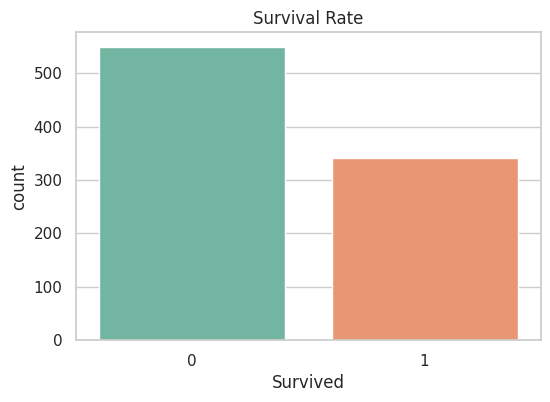

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the style for the plots
sns.set(style="whitegrid")

# Plot survival rate (0 = No, 1 = Yes)
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Survival Rate')
plt.show()

**Survival by Gender**

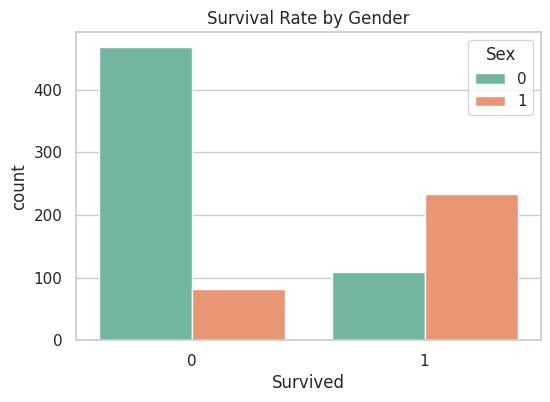

In [24]:
# Plot survival rate by gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set2')
plt.title('Survival Rate by Gender')
plt.show()

**Age Distribution**

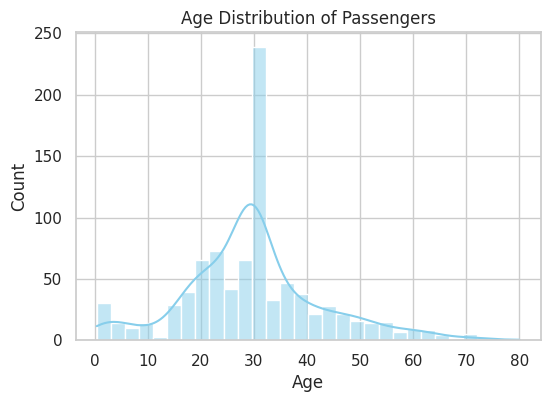

In [25]:
# Plot the distribution of ages
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.show()

**Survival by Pclass**

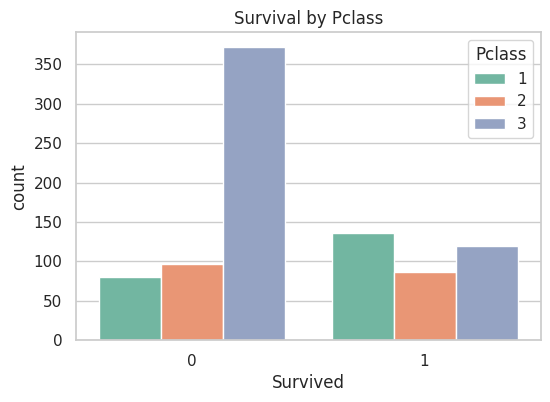

In [26]:
# Plot survival rate by Pclass
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set2')
plt.title('Survival by Pclass')
plt.show()

**Correlation Heatmap**

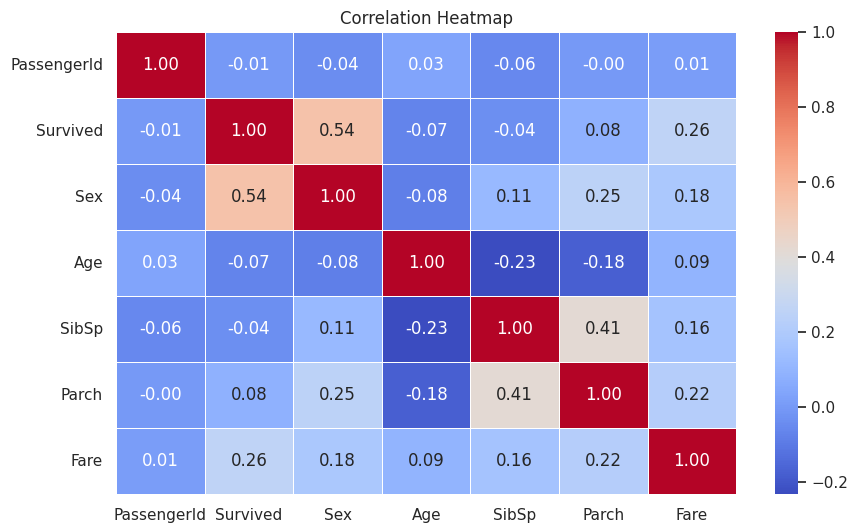

In [28]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()